
# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_dir = '/content/drive/MyDrive/Dataset of Breast mammography images with Masses'
lst=os.listdir(image_dir)[3]
lst1=os.listdir(image_dir+"/"+lst)
lst1

['Density1Benign',
 'Density1Malignant',
 'Density2Benign',
 'Density2Malignant',
 'Density3Benign',
 'Density3Malignant',
 'Density4Benign',
 'Density4Malignant']

In [ ]:
image_folder=os.path.join(image_dir,lst,lst1[i],lst1[0])
image_folder

'/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Image After Data Augmentation, Image Size 224x224/Density4Benign/Density4Benign'

In [ ]:
from matplotlib.image import imread
import cv2
from tqdm import tqdm

img_arr=[]
labels=[]
for i in range(len(lst1)):
  image_folder=os.path.join(image_dir,lst,lst1[i])
  image_lt=os.listdir(image_folder)
  for img_name in tqdm(image_lt):
    n_img = cv2.imread(os.path.join(image_folder,img_name), cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (299, 299), interpolation = cv2.INTER_LINEAR)
     # grey level
    img_bw = cv2.cvtColor(n_img_size, cv2.COLOR_BGR2GRAY)
    # CLAHE algo
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(img_bw) + 30
    # erosion
    kernel = np.ones((5, 5), np.uint8)
    erode_img = cv2.erode(clahe_img, kernel)
    # RGB
    final_img = cv2.cvtColor(erode_img, cv2.COLOR_GRAY2RGB)
    img_arr.append(final_img)
    labels.append(i)
len(img_arr),len(labels)

100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


(2651, 2651)

In [ ]:
img_array=np.array(img_arr)
label=np.array(labels)

In [ ]:
img_array.shape,label.shape

((2651, 299, 299, 3), (2651,))

In [ ]:
np.save('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/image_X',img_array)
np.save('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/image_y',label)

In [ ]:
import numpy as np
X=np.load('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/image_X.npy')
y=np.load('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/image_y.npy')

In [ ]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,stratify=y)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (1988, 299, 299, 3)
X_test shape : (663, 299, 299, 3)
y_train shape : (1988, 8)
y_test shape : (663, 8)


In [ ]:
del X,y

# Convolution Neural Network

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (299, 299,3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
#tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation = 'relu'),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(8, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       1

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/model_cnn.h5',save_best_only=True,verbose=1,monitor='val_accuracy')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30 , batch_size = 128,callbacks=[callback])

Epoch 1/30
16/16 [==============================] - ETA: 0s - loss: 125.9801 - accuracy: 0.2721
Epoch 1: val_accuracy improved from -inf to 0.31071, saving model to /content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/model_cnn.h5
16/16 [==============================] - 57s 3s/step - loss: 125.9801 - accuracy: 0.2721 - val_loss: 2.0643 - val_accuracy: 0.3107
Epoch 2/30
16/16 [==============================] - ETA: 0s - loss: 2.0359 - accuracy: 0.3149
Epoch 2: val_accuracy improved from 0.31071 to 0.33183, saving model to /content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/model_cnn.h5
16/16 [==============================] - 14s 897ms/step - loss: 2.0359 - accuracy: 0.3149 - val_loss: 1.9393 - val_accuracy: 0.3318
Epoch 3/30
16/16 [==============================] - ETA: 0s - loss: 1.7541 - accuracy: 0.3189
Epoch 3: val_accuracy improved from 0.33183 to 0.33786, saving model to /content/drive/MyDrive/Dataset of Breast mammo

In [ ]:
model.evaluate(X_test,y_test)

21/21 [==============================] - 2s 59ms/step - loss: 2.8334 - accuracy: 0.5596


[2.833449602127075, 0.5595777034759521]

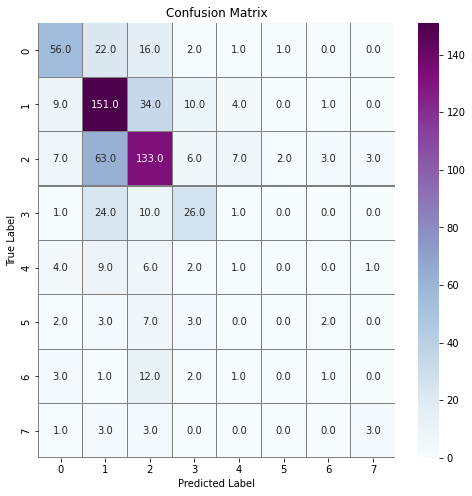

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

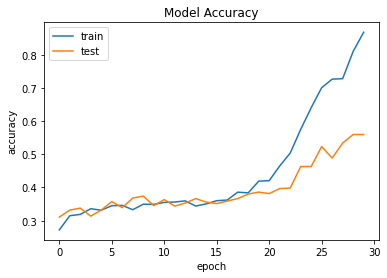

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(X_test)
prediction

array([[3.5579220e-08, 1.8350570e-03, 9.9796164e-01, ..., 1.8346273e-04,
        3.9006914e-06, 1.5633357e-05],
       [3.6949927e-01, 1.2558958e-01, 4.8321721e-01, ..., 4.7733523e-05,
        5.6344364e-04, 1.6944165e-07],
       [1.8845050e-01, 2.0870969e-01, 4.5940199e-01, ..., 3.3189502e-02,
        2.0563185e-02, 4.7792504e-03],
       ...,
       [5.0642306e-04, 9.9824250e-01, 1.2238756e-03, ..., 4.2461451e-12,
        4.5656024e-11, 4.5910287e-16],
       [5.3577145e-07, 5.1565301e-03, 9.8658669e-01, ..., 2.0104244e-06,
        2.0706335e-03, 7.2048715e-05],
       [9.9925226e-01, 2.4209142e-04, 4.9833412e-04, ..., 4.0097680e-06,
        1.8393578e-06, 3.4792760e-07]], dtype=float32)

# Transfer learning


## Inception V3

In [ ]:
import tensorflow as tf

image_model = tf.keras.applications.InceptionV3(include_top=True,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-2].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
image_features_extract_model.summary()

96124928/96112376 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_5[0][0]']               
 alization)                  

In [ ]:
image_embed=image_features_extract_model.predict(X_train)
image_embed.shape

(1988, 2048)

In [ ]:
image_embed_test=image_features_extract_model.predict(X_test)
image_embed_test.shape

(663, 2048)

In [ ]:
np.save('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/vector_xtrain',image_embed)
np.save('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/vector_xtest',image_embed_test)

In [ ]:
inc_Xtrain=np.load('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/vector_xtrain.npy')
inc_Xtest=np.load('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/vector_xtest.npy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(2048,), activation='tanh'))
model.add(Dense(128, activation='tanh'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                131136    
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 140,488
Trainable params: 140,488
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/model_v3.h5',save_best_only=True,verbose=1,monitor='val_accuracy')

In [ ]:
history = model.fit(inc_Xtrain, y_train, validation_data = (inc_Xtest, y_test), epochs =100 , batch_size = 128,callbacks=[callback])

Epoch 1/100
15/16 [===========================>..] - ETA: 0s - loss: 1.7027 - accuracy: 0.3333
Epoch 1: val_accuracy improved from -inf to 0.35747, saving model to /content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/model_v3.h5
16/16 [==============================] - 1s 31ms/step - loss: 1.6996 - accuracy: 0.3310 - val_loss: 1.6154 - val_accuracy: 0.3575
Epoch 2/100
 1/16 [>.............................] - ETA: 0s - loss: 1.6507 - accuracy: 0.3594
Epoch 2: val_accuracy did not improve from 0.35747
16/16 [==============================] - 0s 5ms/step - loss: 1.5979 - accuracy: 0.3566 - val_loss: 1.5834 - val_accuracy: 0.3514
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 1.5831 - accuracy: 0.3438
Epoch 3: val_accuracy improved from 0.35747 to 0.39216, saving model to /content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/model_v3.h5
16/16 [==============================] - 0s 8ms/step - loss: 1.5618 - ac

In [ ]:
model.evaluate(inc_Xtest, y_test)[1]

21/21 [==============================] - 0s 3ms/step - loss: 1.2421 - accuracy: 0.5792


0.5791855454444885

# Final Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
cnn_model1=load_model('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/model_cnn.h5')
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       1

In [ ]:
inc_Xtrain.shape,inc_Xtest.shape

((1988, 2048), (663, 2048))

In [ ]:
cnn_extractor1=Model(inputs=cnn_model1.input,outputs=cnn_model1.get_layer('dense_1').output)
cnn_extractor1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 299, 299, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       7385

In [ ]:
image_embed_train1=cnn_extractor1.predict(X_train)
image_embed_train1.shape

(1988, 128)

In [ ]:
image_embed_test1=cnn_extractor1.predict(X_test)
image_embed_test1.shape

(663, 128)

In [ ]:
final_Xtrain1=np.hstack((inc_Xtrain,image_embed_train1))

In [ ]:
final_Xtest1=np.hstack((inc_Xtest,image_embed_test1))

In [ ]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train1=y_train
y_train1=np.where(y_train1==1)[1]

In [ ]:
y_train1

array([2, 2, 2, ..., 0, 3, 3])

In [ ]:
y_test1=y_test
y_test1=np.where(y_test1==1)[1]

# Machine learning Classifier

In [ ]:
import xgboost
from xgboost import XGBClassifier
model1 = XGBClassifier()
# fit the model on the whole dataset
model1.fit(final_Xtrain1,y_train1)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred1 = model1.predict(final_Xtest1)
y_pred1

array([2, 2, 2, 1, 1, 2, 3, 1, 2, 3, 0, 2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 1,
       2, 4, 2, 2, 2, 2, 1, 2, 2, 7, 1, 1, 2, 0, 2, 3, 2, 1, 1, 3, 2, 2,
       1, 1, 1, 3, 2, 1, 0, 0, 2, 2, 1, 3, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 0, 1, 3, 1,
       2, 0, 3, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 2, 2, 4, 3, 1, 1, 1, 6, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 4, 3, 3, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 0, 1, 2, 2, 2, 3, 3, 1, 0, 1, 0,
       1, 2, 3, 1, 3, 1, 1, 0, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 3, 2, 1, 2, 1, 0, 2, 1, 2, 4, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 0, 1, 1, 1, 4, 2, 0, 1, 2, 3, 1, 1, 2, 0, 1, 2, 3, 0, 3, 1, 2,
       2, 1, 1, 1, 2, 3, 1, 2, 2, 1, 6, 2, 3, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 3, 1, 3, 1, 1, 1, 0, 2, 1, 1, 3, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test1, y_pred1))
cm

Accuracy :  0.6742081447963801


array([[ 61,  15,  20,   0,   2,   0,   0,   0],
       [  4, 175,  22,   6,   2,   0,   0,   0],
       [  4,  35, 175,   4,   2,   1,   3,   0],
       [  0,  20,  12,  29,   1,   0,   0,   0],
       [  2,  14,   3,   2,   2,   0,   0,   0],
       [  3,   3,   8,   2,   0,   0,   1,   0],
       [  3,   2,  11,   3,   0,   0,   1,   0],
       [  0,   1,   5,   0,   0,   0,   0,   4]])

# final model classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70        98
           1       0.66      0.84      0.74       209
           2       0.68      0.78      0.73       224
           3       0.63      0.47      0.54        62
           4       0.22      0.09      0.12        23
           5       0.00      0.00      0.00        17
           6       0.20      0.05      0.08        20
           7       1.00      0.40      0.57        10

    accuracy                           0.67       663
   macro avg       0.52      0.41      0.43       663
weighted avg       0.64      0.67      0.65       663



In [ ]:
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       1

In [ ]:
y_pred = cnn_model1.predict(X_test)

In [ ]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred

array([[4.08096980e-07, 2.27702921e-03, 9.97700036e-01, ...,
        1.29380351e-05, 1.12912301e-06, 6.17997512e-06],
       [3.88567895e-01, 1.51883170e-01, 4.51965541e-01, ...,
        1.70589265e-04, 4.42469638e-04, 4.41589606e-07],
       [1.71706960e-01, 2.39524871e-01, 4.75417942e-01, ...,
        3.97891551e-02, 1.54958339e-02, 5.03610820e-03],
       ...,
       [1.32241193e-02, 9.76499915e-01, 1.02635873e-02, ...,
        2.66706431e-11, 7.78476561e-10, 3.15532173e-14],
       [4.75322076e-06, 1.22890575e-02, 9.82027352e-01, ...,
        7.58417737e-05, 1.47054601e-03, 3.59124824e-05],
       [9.59036946e-01, 2.63447333e-02, 1.44154243e-02, ...,
        1.58662238e-04, 1.44946953e-05, 5.77091078e-06]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [ ]:
y_test.shape,y_pred.shape,y_pred_classes.shape

((663, 8), (663, 8), (663,))

In [ ]:
y_pred_classes

array([2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 0, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1,
       1, 2, 1, 2, 2, 0, 1, 2, 2, 7, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2,
       1, 1, 1, 3, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0,
       5, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 3, 1, 2, 0, 1, 2, 1,
       2, 0, 3, 3, 1, 2, 2, 2, 3, 1, 1, 1, 1, 0, 3, 2, 3, 1, 1, 2, 6, 1,
       2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 4, 2, 3, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0,
       1, 2, 3, 1, 3, 1, 1, 0, 0, 1, 1, 3, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 3, 2, 2, 1, 1, 5, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 1,
       1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 3, 1, 1, 2, 2, 1, 2, 3, 1, 3, 1, 2,
       1, 1, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2,
       0, 1, 1, 3, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 5,
       1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2, 1, 1, 3, 0,

In [ ]:
y_test2=np.argmax(y_test,axis = 1)

In [ ]:
y_test2

array([2, 4, 7, 1, 0, 1, 3, 1, 3, 3, 0, 2, 0, 2, 1, 2, 2, 4, 6, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 7, 3, 2, 2, 0, 2, 5, 2, 3, 1, 3, 1, 2,
       1, 1, 2, 3, 2, 1, 0, 0, 2, 2, 0, 3, 0, 1, 1, 2, 3, 0, 2, 7, 2, 1,
       1, 2, 2, 4, 2, 1, 0, 3, 2, 3, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 6, 0,
       2, 1, 3, 2, 0, 0, 0, 0, 5, 1, 6, 1, 1, 4, 2, 3, 1, 2, 0, 1, 4, 1,
       1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 4, 1, 1, 1, 1, 6, 1,
       4, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 4, 0, 3, 3, 3, 1, 1, 4, 1,
       2, 1, 3, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 6, 6, 1, 0, 1, 0,
       2, 2, 5, 0, 3, 1, 1, 0, 4, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       5, 1, 1, 3, 2, 2, 2, 1, 0, 2, 0, 7, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 0, 1, 1, 4, 3, 1, 0, 2, 2, 3, 1, 1, 3, 0, 1, 2, 3, 5, 3, 4, 2,
       2, 1, 2, 1, 2, 3, 1, 2, 1, 1, 2, 4, 2, 0, 1, 1, 0, 1, 2, 1, 2, 7,
       0, 1, 1, 2, 1, 2, 1, 2, 2, 4, 4, 2, 0, 5, 3, 4, 6, 1, 1, 3, 2, 1,
       4, 1, 1, 3, 1, 1, 1, 1, 1, 5, 2, 1, 1, 2, 0,

# CNN Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63        98
           1       0.54      0.73      0.62       209
           2       0.57      0.60      0.58       224
           3       0.55      0.37      0.44        62
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        17
           6       0.33      0.05      0.09        20
           7       0.60      0.30      0.40        10

    accuracy                           0.56       663
   macro avg       0.41      0.33      0.35       663
weighted avg       0.53      0.56      0.54       663



In [ ]:
mod=load_model('/content/drive/MyDrive/Dataset of Breast mammography images with Masses/Model_Files/model_v3.h5')
mod.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                131136    
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 140,488
Trainable params: 140,488
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = mod.predict(inc_Xtest)

In [ ]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [ ]:
y_test2=np.argmax(y_test,axis = 1)

# inception classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70        98
           1       0.71      0.70      0.71       209
           2       0.52      0.72      0.61       224
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        10

    accuracy                           0.59       663
   macro avg       0.23      0.29      0.25       663
weighted avg       0.49      0.59      0.53       663



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Results

In [ ]:
#Results
#CNN :- 55.957%
#InceptionV3 :- 59%
#Final Results :- 67.421%